<a href="https://colab.research.google.com/github/Hgherzog/mlpractice/blob/main/kernelsvmandgraddescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4.113813515696462
best lambda 1
0
261.048418043467
best lambda 2
0
45.32649637034671
best lambda 3
0


Text(0.5, 1.0, 'bestlambda3=0')

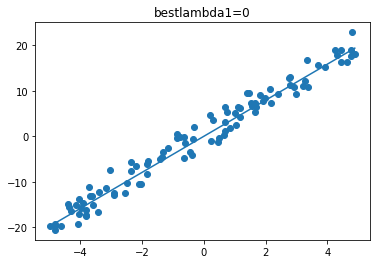

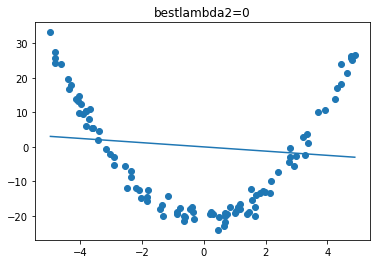

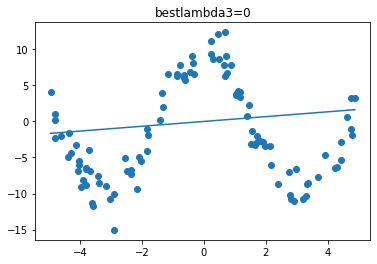

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# load the data matrix X
d_new =np.load('kernelreg.npz')
x1_train=d_new['x1_train']
x1_test=d_new['x1_test']
x2_train=d_new['x2_train']
x2_test=d_new['x2_test']
x3_train=d_new['x3_train']
x3_test=d_new['x3_test']
y1_train=d_new['y1_train']
y1_test=d_new['y1_test']
y2_train=d_new['y2_train']
y2_test=d_new['y2_test']
y3_train=d_new['y3_train']
y3_test=d_new['y3_test']
#Combine train and test data
x1=np.concatenate((x1_train,x1_test))
y1=np.concatenate((y1_train,y1_test))
x2=np.concatenate((x2_train,x2_test))
y2=np.concatenate((y2_train,y2_test))
x3=np.concatenate((x3_train,x3_test))
y3=np.concatenate((y3_train,y3_test))

lambda_vals = np.array ([0, 1, 5, 10])
param_err_RLS1 = np.zeros(len(lambda_vals))
param_err_RLS2 = np.zeros(len(lambda_vals))
param_err_RLS3 = np.zeros(len(lambda_vals))

#determine the best lambda parameter for first data set
for k in range(len(lambda_vals)):
  w_r=(1 /(x1@x1 +lambda_vals[k]))*x1@y1
  err_sum=0
  for i in range(len(x1)):
    err=np.linalg.norm(y1[i]-x1[i]*w_r)**2
    err_sum=err_sum+err
  err_avg=err_sum / len(x1)
  param_err_RLS1[k]=err_avg
best_lambda1=np.argmin(param_err_RLS1)
print(param_err_RLS1[best_lambda1])
plt.figure(0)
plt.scatter(x1,y1)
slope=(1 /(x1@x1 +lambda_vals[best_lambda1]))*x1@y1
x_vals=np.linspace(np.min(x1), np.max(x1))

print("best lambda 1")
print(lambda_vals[best_lambda1])
plt.plot(x_vals, slope*x_vals, label='decision boundary')
plt.title("bestlambda1=0")

#calculate for data set 2
err_avg=0
for k in range(len(lambda_vals)):
  w_r=(1 /(x2.T@x2 +lambda_vals[k]))*x1.T@y2
  err_sum=0
  y_hat=x2*w_r
  for i in range(len(x2)):
    err=np.linalg.norm(y2[i]-y_hat[i])**2
    err_sum=err_sum+err
  err_avg=err_sum / len(x2)
  param_err_RLS2[k]=err_avg
best_lambda2=np.argmin(param_err_RLS2)
print(param_err_RLS2[best_lambda2])

plt.figure(1)
plt.scatter(x2,y2)
slope=(1 /(x2@x2 +lambda_vals[best_lambda2]))*x2@y2
x_vals=np.linspace(np.min(x2), np.max(x2))

print("best lambda 2")
print(lambda_vals[best_lambda2])
plt.plot(x_vals, slope*x_vals, label='decision boundary')
plt.title('bestlambda2=0')
#calculate for data set 3
err_avg=0
for k in range(len(lambda_vals)):
  w_r=(1 /(x3@x3 +lambda_vals[k]))*x3@y3
  err_sum=0
  for i in range(len(x3)):
    err=np.linalg.norm(y3[i]-x3[i]*w_r)**2
    err_sum=err_sum+err
  err_avg=err_sum / len(x3)
  param_err_RLS3[k]=err_avg
best_lambda3=np.argmin(param_err_RLS3)
print(param_err_RLS3[best_lambda3])

plt.figure(2)
plt.scatter(x3,y3)
slope=(1 /(x3@x3 +lambda_vals[best_lambda3]))*x3@y3
x_vals=np.linspace(np.min(x3), np.max(x3))

print("best lambda 3")
print(lambda_vals[best_lambda3])
plt.plot(x_vals, slope*x_vals, label='decision boundary')
plt.title('bestlambda3=0')

3.883800845753179
best lambda 1
0
3.671426021973389
best lambda 2
0
34.12370146900199
[34.12370147 34.12426933 34.13570647 34.16337153]
best lambda 3
0


Text(0.5, 1.0, 'bestlambda3=0')

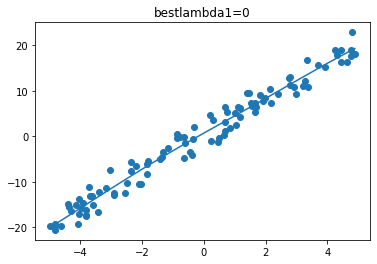

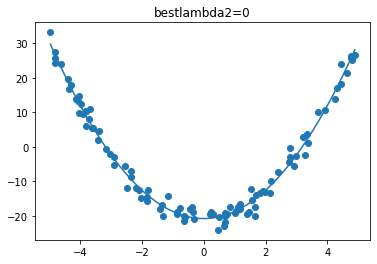

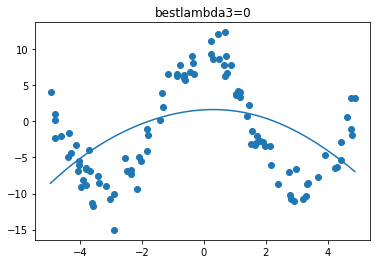

In [ ]:
#2b
#Transform data 
a=np.ones(len(x1))
x1sq=x1*x1

vfunc=np.vectorize(np.sin)
X1=np.column_stack((a,x1,x1sq,vfunc(x1)))

x2sq=x2*x2

X2=np.column_stack((a,x2,x2sq,vfunc(x2)))

x3sq=x3*x3

X3=np.column_stack((a,x3,x3sq,vfunc(x3)))

#Repeat part a
err_avg=0
for k in range(len(lambda_vals)):
  U, s, Vt=np.linalg.svd(X1)
  rSig=s*(np.true_divide(np.ones(len(s)),(s*s + lambda_vals[k]*np.ones(len(s)))))
  rinvSig=np.vstack((np.diag(rSig), np.zeros((100-len(s),4)))).T
  w_r=Vt.T@rinvSig@U.T@y1
  err_sum=0
  for i in range(len(x1)):
    err=np.linalg.norm(y1[i]-X1[i]@w_r)**2
    err_sum=err_sum+err
  err_avg=err_sum / len(x1)
  param_err_RLS1[k]=err_avg
best_lambda1=np.argmin(param_err_RLS1)
print(param_err_RLS1[best_lambda1])
plt.figure(0)
plt.scatter(x1,y1)
x_vals=np.linspace(np.min(x1), np.max(x1))
print("best lambda 1")
print(lambda_vals[best_lambda1])
rSig=s*(np.true_divide(np.ones(len(s)),(s*s + lambda_vals[best_lambda1]*np.ones(len(s)))))
rinvSig=np.vstack((np.diag(rSig), np.zeros((100-len(s),4)))).T
w=Vt.T@rinvSig@U.T@y1
plt.plot(x_vals, w[0]+w[1]*x_vals + w[2]*x_vals**2 + w[3]*np.sin(x_vals), label='decision boundary')
plt.title("bestlambda1=0")


err_avg=0
for k in range(len(lambda_vals)):
  U, s, Vt=np.linalg.svd(X2)
  rSig=s*(np.true_divide(np.ones(len(s)),(s*s + lambda_vals[k]*np.ones(len(s)))))
  rinvSig=np.vstack((np.diag(rSig), np.zeros((100-len(s),4)))).T
  w_r=Vt.T@rinvSig@U.T@y2
  err_sum=0
  for i in range(len(x2)):
    err=np.linalg.norm(y2[i]-X2[i]@w_r)**2
    err_sum=err_sum+err
  err_avg=err_sum / len(x1)
  param_err_RLS2[k]=err_avg
best_lambda2=np.argmin(param_err_RLS1)
print(param_err_RLS2[best_lambda2])
plt.figure(1)
plt.scatter(x2,y2)
x_vals=np.linspace(np.min(x2), np.max(x2))
print("best lambda 2")
print(lambda_vals[best_lambda2])
rSig=s*(np.true_divide(np.ones(len(s)),(s*s + lambda_vals[best_lambda1]*np.ones(len(s)))))
rinvSig=np.vstack((np.diag(rSig), np.zeros((100-len(s),4)))).T
w=Vt.T@rinvSig@U.T@y2
plt.plot(x_vals, w[0]+w[1]*x_vals + w[2]*x_vals**2 + w[3]*np.sin(x_vals), label='decision boundary')
plt.title("bestlambda2=0")

err_avg=0
for k in range(len(lambda_vals)):
  U, s, Vt=np.linalg.svd(X3)
  rSig=s*(np.true_divide(np.ones(len(s)),(s*s + lambda_vals[k]*np.ones(len(s)))))
  rinvSig=np.vstack((np.diag(rSig), np.zeros((100-len(s),4)))).T
  w_r=Vt.T@rinvSig@U.T@y3
  err_sum=0
  for i in range(len(x3)):
    err=np.linalg.norm(y3[i]-X3[i]@w_r)**2
    err_sum=err_sum+err
  err_avg=err_sum / len(x3)
  param_err_RLS3[k]=err_avg
best_lambda3=np.argmin(param_err_RLS1)
print(param_err_RLS3[best_lambda3])
print(param_err_RLS3)
plt.figure(2)
plt.scatter(x3,y3)
x_vals=np.linspace(np.min(x3), np.max(x3))
print("best lambda 3")
print(lambda_vals[best_lambda3])
rSig=s*(np.true_divide(np.ones(len(s)),(s*s + lambda_vals[best_lambda1]*np.ones(len(s)))))
rinvSig=np.vstack((np.diag(rSig), np.zeros((100-len(s),4)))).T
w=Vt.T@rinvSig@U.T@y3
plt.plot(x_vals, w[0]+w[1]*x_vals + w[2]*x_vals**2 + w[3]*np.sin(x_vals), label='decision boundary')
plt.title("bestlambda3=0")


In [ ]:
#2d Kenrel regularization

#we need lambda as well right
def krr(K,y,l):
  return np.linalg.inv(K + l*np.identity(len(K)))@y
param_err_kera1=np.zeros(len(lambda_vals))
param_err_kerb1=np.zeros(len(lambda_vals))

param_err_kera2=np.zeros(len(lambda_vals))
param_err_kerb2=np.zeros(len(lambda_vals))

param_err_kera3=np.zeros(len(lambda_vals))
param_err_kerb3=np.zeros(len(lambda_vals))
#Reshape xi and yi
x1=np.reshape(x1,(100,1))
x2=np.reshape(x2,(100,1))
x3=np.reshape(x3,(100,1))
y1=np.reshape(y1,(100,1))
y2=np.reshape(y2,(100,1))
y3=np.reshape(y3,(100,1))
#Redo part a with XX.T=K
#First data seta
for k in range(len(lambda_vals)):
  err_avg=0
  err=0
  err_sum=0
  a=krr(x1@x1.T,y1,lambda_vals[k])
  y_hat=x1@x1.T@a
  for i in range(len(x1)):
    err=np.linalg.norm(y1[i]-y_hat[i])**2
    err_sum=err_sum+err
  err_avg=err_sum / len(x1)
  param_err_kera1[k]=err_avg
best_lambda1a=np.argmin(param_err_kera1)
print(lambda_vals[best_lambda1a])
print(param_err_kera1[best_lambda1a])

#Second data seta
for k in range(len(lambda_vals)):
  err_avg=0
  err=0
  err_sum=0
  a=krr(x2@x2.T,y2,lambda_vals[k])
  y_hat=x2@x2.T@a
  for i in range(len(x2)):
    err=np.linalg.norm(y2[i]-y_hat[i])**2
    err_sum=err_sum+err
  err_avg=err_sum / len(x2)
  param_err_kera2[k]=err_avg
best_lambda2a=np.argmin(param_err_kera2)
print(lambda_vals[best_lambda2a])
print(param_err_kera2[best_lambda2a])
#Third data set a
for k in range(len(lambda_vals)):
  err_avg=0
  err=0
  err_sum=0
  a=krr(x3@x3.T,y2,lambda_vals[k])
  y_hat=x3@x3.T@a
  for i in range(len(x3)):
    err=np.linalg.norm(y3[i]-y_hat[i])**2
    err_sum=err_sum+err
  err_avg=err_sum / len(x3)
  param_err_kera3[k]=err_avg
best_lambda3a=np.argmin(param_err_kera3)
print(lambda_vals[best_lambda3a])
print(param_err_kera3[best_lambda3a])
#redo part b with K as in part 3
for k in range(len(lambda_vals)):
  err_avg=0
  err=0
  err_sum=0
  a=krr(X1@X1.T,y1,lambda_vals[k])
  y_hat=X1@X1.T@a
  for i in range(len(X1)):
    err=np.linalg.norm(y1[i]-y_hat[i])**2
    err_sum=err_sum+err
  err_avg=err_sum / len(X1)
  param_err_kerb1[k]=err_avg
best_lambda1b=np.argmin(param_err_kerb1)
print(lambda_vals[best_lambda1b])
print(param_err_kerb1[best_lambda1b])

#Second data setb
for k in range(len(lambda_vals)):
  err_avg=0
  err=0
  err_sum=0
  a=krr(X2@X2.T,y2,lambda_vals[k])
  y_hat=X2@X2.T@a
  for i in range(len(X2)):
    err=np.linalg.norm(y2[i]-y_hat[i])**2
    err_sum=err_sum+err
  err_avg=err_sum / len(x2)
  param_err_kerb2[k]=err_avg
best_lambda2b=np.argmin(param_err_kerb2)
print(lambda_vals[best_lambda2b])
print(param_err_kerb2[best_lambda2b])
#Third data set b
for k in range(len(lambda_vals)):
  err_avg=0
  err=0
  err_sum=0
  a=krr(X3@X3.T,y3,lambda_vals[k])
  y_hat=X3@X3.T@a
  for i in range(len(X3)):
    err=np.linalg.norm(y3[i]-y_hat[i])**2
    err_sum=err_sum+err
  err_avg=err_sum / len(X3)
  param_err_kerb3[k]=err_avg
best_lambda3b=np.argmin(param_err_kerb3)
print(lambda_vals[best_lambda3b])
print(param_err_kerb3[best_lambda3b])

1
4.1140014900858874
1
261.0484225138544
10
52.734979606125314
1
3.8840874687274902
1
3.764527932582695
1
34.12426933489078
[1.38741051e+08 3.41242693e+01 3.41357065e+01 3.41633715e+01]


In [ ]:
#Problem 4
import numpy as np
n = 40 # number of data points
d = 2 # dimensionality of the data
np.random.seed(0)
X = np.random.rand(n, d)

w = np.array([1, -1])
y = 1 - 2*(X @ w > 0)
# make linear kernel with the thing
K=X@X.T
#for i in range(len(X[0,:])):
  #for j in range(len(X[:, 0])):
   # K[i,j]=X[i,:].T@X[j,:]

def kernel_svm(K, y, lamb=0.01, alpha_init=None, eta=0.01, 
               max_step=1000):
  """
  Compute the optimal alpha for an SVM using the kernel matrix K 
  and observations y. 

  alpha_init: our initial value for alpha
  eta: step size

  """

  n = len(y) 

  if alpha_init is None:
      alpha_init = np.zeros(n)


  assert K.shape == (n, n)
  assert len(alpha_init) == n
  # make sure all labels are +/- 1 and that we have 
  # both positive and negative labels
  assert ( np.unique(y) ==   np.array([-1, 1])).all()

  alpha_k = alpha_init 

  for k in range(max_step):
    alpha_old = alpha_k 
    ## your code here to update alpha_k
    b=0
    for i in range(40):
      if y[i]*K[:, i].T@alpha_old < 1:
        b=b-y[i]*K[:, i]
    alpha_k=alpha_old - eta*b - 2*eta*lamb*K@alpha_old
    y_est = K@alpha_k
    accuracy = np.mean((y_est > 0 ) == (y > 0))
    alpha_norm_change = np.linalg.norm(alpha_k -alpha_old)
    print(f"{k:5}: ||\delta alpha||={alpha_norm_change:3.2f}",
         f"accuracy={accuracy*100:3.1f}%")
    if np.linalg.norm(alpha_k -alpha_old) < 1e-1:
      break
  return alpha_k

#calculate accuracy over iterations
kernel_svm(K, y, lamb=0.01, alpha_init=np.random.rand(n), eta=0.01, 
               max_step=1000)


    0: ||\delta alpha||=0.73 accuracy=45.0%
    1: ||\delta alpha||=0.73 accuracy=45.0%
    2: ||\delta alpha||=0.72 accuracy=45.0%
    3: ||\delta alpha||=0.72 accuracy=45.0%
    4: ||\delta alpha||=0.21 accuracy=100.0%
    5: ||\delta alpha||=0.21 accuracy=65.0%
    6: ||\delta alpha||=0.18 accuracy=62.5%
    7: ||\delta alpha||=0.36 accuracy=60.0%
    8: ||\delta alpha||=0.33 accuracy=67.5%
    9: ||\delta alpha||=0.32 accuracy=62.5%
   10: ||\delta alpha||=0.46 accuracy=65.0%
   11: ||\delta alpha||=0.52 accuracy=60.0%
   12: ||\delta alpha||=0.58 accuracy=65.0%
   13: ||\delta alpha||=0.54 accuracy=70.0%
   14: ||\delta alpha||=0.53 accuracy=65.0%
   15: ||\delta alpha||=0.54 accuracy=70.0%
   16: ||\delta alpha||=0.58 accuracy=65.0%
   17: ||\delta alpha||=0.54 accuracy=75.0%
   18: ||\delta alpha||=0.40 accuracy=72.5%
   19: ||\delta alpha||=0.33 accuracy=82.5%
   20: ||\delta alpha||=0.27 accuracy=80.0%
   21: ||\delta alpha||=0.33 accuracy=75.0%
   22: ||\delta alpha||=0.37 ac

array([ 0.09721004, -0.07159149, -0.01139266,  0.84166934, -0.7034493 ,
       -0.56173016,  0.4822168 ,  0.05986026,  1.38335893,  0.47056038,
       -0.55671308,  0.66297979,  0.57559774,  1.42523402, -0.18895972,
        0.511184  ,  0.37671578,  0.61252069,  0.39990954, -0.92928301,
        0.50137138, -0.86929097,  0.26642815,  0.73065183,  0.07397872,
        0.03882691, -1.00515549,  0.3760615 , -0.64433262,  0.3977366 ,
        0.28527594, -0.14298012,  0.73424168, -1.01679629, -0.53061379,
       -0.80937093, -0.18753159, -0.65093082,  0.51676828,  0.30314003])